In [246]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from tp_arbres_source import *
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from matplotlib import rc

plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 10,
          'text.color':"blue",
          'legend.fontsize': 16,
          "xtick.color":"green",
          "ytick.color":"green",
          'axes.labelcolor' : "green",
          'text.usetex': False,
          'figure.figsize': (12, 6)}
plt.rcParams.update(params)

# ! scikit-learn uses an optimised version of the CART algorithm; however, scikit-learn implementation does not support categorical variables for now.


In [247]:

#TODO With rand_checkers simulate datasets of size n “ 456 
n = int(456/4)
X, y = rand_checkers(n, n, n, n)[:, :2], rand_checkers(n, n, n, n)[:, 2]

#TODO check classes balancing
print(f"shape of this rand_checkers dataset is {len(y)}")
unique, count = np.unique(y, return_counts=True)
print("number of occurrences of each class is \n ",
    f"{np.append(unique,count).reshape(-1,len(unique)).T} \n" ,
        "we notice that we have balanced classes")


shape of this rand_checkers dataset is 448
number of occurrences of each class is 
  [[  0. 112.]
 [  1. 112.]
 [  2. 112.]
 [  3. 112.]] 
 we notice that we have balanced classes


## question 1

in regression framework when the target is a numerical variable so we won't compute the cardinal of: <br>

${\{i\in \parallel 1,n \parallel \ : x_i \in R \: et \: y_i = k \}}$ (1) <br>

however we will compute instead of (1) the following formulas: 

${ \sum_{y \in R} y }$
<br>
<br>
Therefor  ${H(R) = \dfrac {\sum_{y \in R} (y - P_k(R) )^2}{Card(R) }}$ : Mean Squared Error:

## Question 2

In [248]:

# ! we create a class ErrorCurve which helps to plot error when we change max_depth
class ErrorCurve(object):
    def __init__(self, k_range=None,  criterion="gini", cross=False):
        """[this initialization of the class]

        Args:
            k_range ([range], optional): [the range of possible max_depth values]. Defaults to None.
            criterion (str, optional): [either gini or entropy criterion]. Defaults to "gini".
            cross (bool, optional): [either using cross_validation_score or not]. Defaults to False.
        """
        if k_range is None:
            k_range = list(range(1, 6))
        self.k_range = k_range
        self.criterion = criterion
        self.cross = cross

    def fit_curve(self, X, y, Xtest, ytest):
        """[This function fit training data to our clf then performs
        the prediction and evaluate score]

        Args:
            X ([np.ndarray]): [Train data]
            y ([np.ndarray]): [Train target]
            Xtest ([np.ndarray]): [Test data]
            ytest ([np.ndarray]): [Test target]
        """

        def error_func(k):
            """[this function return error of a specified max_depth]

            Args:
                k ([number]): [max_depth]

            Returns:
                [error]: [error for this max_depth]
            """
            clf = DecisionTreeClassifier(max_depth=k, criterion=self.criterion)
            if self.cross:
                error = 1-cross_val_score(clf, X, y, cv=5).mean()
                return error
            else:
                clf.fit(X, y)
                error = np.mean(clf.predict(Xtest) != ytest)
                return error

        errors = list(map(error_func, self.k_range))
        self.errors = np.array(errors)
        self.y = y

    def plot(self, marker='o', maketitle=False, legend=False, **kwargs):
        """[this function plots the error curve]

        Args:
            marker (str, optional): [marker time of matplotlib.pyplot]. Defaults to 'o'.
            maketitle (str, optional): [the title of the plot]. Defaults to False.
            legend (bool, optional): [either the plot shows the legend or not]. Defaults to False.
        """
        plt.plot(self.k_range, self.errors, marker=marker, **kwargs)
        plt.xlabel("Maximal depth")
        plt.ylabel("Test error")
        if maketitle:
            plt.title(f" {maketitle} ==> N of training points : {len(self.y)}")
        if legend:
            plt.legend()

    def best_param(self):
        """[this function save the best max_depth params]

        Returns:
            [number]: [return the best max_depth parametre]
        """
        return self.k_range[np.argmin(self.errors)]


In [249]:

# TODO we start by spliting our dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, train_size=.8)
print(f"shape of our X_train is {X_train.shape} , shape of y_train is {y_train.shape} , \n \
      shape of X_test is {X_test. shape} , shape of y_test is {y_test.shape}")


shape of our X_train is (358, 2) , shape of y_train is (358,) , 
       shape of X_test is (90, 2) , shape of y_test is (90,)


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Computer Modern Roman


the best max_depth with gini criterion is 19
the best max_depth with $entropy criterion$ is 15


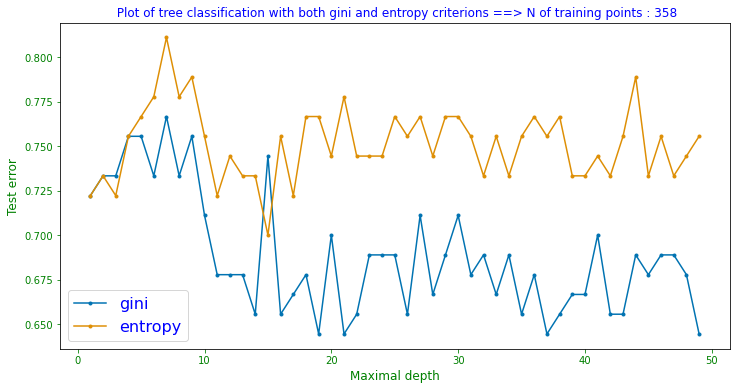

In [250]:

# ** instantiate ErrorCurve with k_range
error_curve_gini = ErrorCurve(k_range=range(1, 50), criterion="gini")
# * fit it, plot it for gini
error_curve_gini.fit_curve(X_train, y_train, X_test, y_test)
error_curve_gini.plot(marker=".", label="gini")
print(
    f"the best max_depth with gini criterion is {error_curve_gini.best_param()}")


# ** instantiate ErrorCurve with k_range and criterion entropy
error_curve_en = ErrorCurve(k_range=range(1, 50), criterion="entropy")
# * fit it, plot it for entropy
error_curve_en.fit_curve(X_train, y_train, X_test, y_test)
error_curve_en.plot(marker=".", label="entropy", legend=True,
                    maketitle="Plot of tree classification with both gini and entropy criterions")
print(
    f"the best max_depth with $entropy criterion$ is {error_curve_en.best_param()}")


We can conclude that gini criterion is better than entropy on our dataset

## Question 3

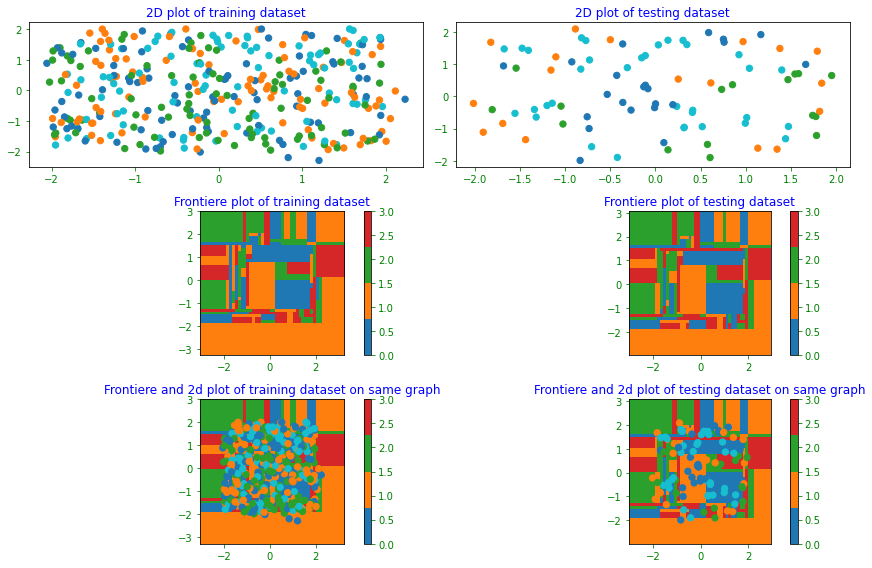

In [251]:

# TODO then we build our model with sklearn.tree.DecisionTreeClassifier
clf = DecisionTreeClassifier(
    max_depth=error_curve_en.best_param(), criterion=error_curve_en.criterion)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

plt.figure(1, figsize=(12, 8))

# TODO 2D plot of training dataset
plt.subplot(3, 2, 1)
plot_2d_simple(X_train, y_train)
plt.title("2D plot of training dataset")
plt.tight_layout()


# TODO Frontiere plot of training dataset
plt.subplot(3, 2, 3)
frontiere(clf.predict, X_train)
plt.title("Frontiere plot of training dataset")
plt.tight_layout()


# TODO 2D plot of testing dataset
plt.subplot(3, 2, 2)
plot_2d_simple(X_test, y_pred)
plt.title("2D plot of testing dataset")
plt.tight_layout()


# TODO Frontiere plot of testing dataset
plt.subplot(3, 2, 4)
plt.title("Frontiere plot of testing dataset")
frontiere(clf.predict, X_test)
plt.tight_layout()


# TODO Frontiere and 2d plot of training dataset on same graph
plt.subplot(3, 2, 5)
plot_2d_simple(X_train, y_train)
plt.title("Frontiere and 2d plot of training dataset on same graph")
frontiere(clf.predict, X_train)
plt.tight_layout()


# TODO Frontiere and 2d plot of testing dataset on same graph
plt.subplot(3, 2, 6)
plot_2d_simple(X_test, y_pred)
plt.title("Frontiere and 2d plot of testing dataset on same graph")
frontiere(clf.predict, X_test)
plt.tight_layout()

# plt.figure(1, figsize=(20, 12)).tight_layout()

## Question 4

In [252]:

# TODO Create n +160 + 40 + 40 + 40 + 40 new data points with rand_checkers.
n = int(160/4)
X_new, y_new = rand_checkers(
    n, n, n, n)[:, :2], rand_checkers(n, n, n, n)[:, 2]
print(f"shape of this rand_checkers dataset is {len(y_new)}")
unique, count = np.unique(y_new, return_counts=True)
print(
    f"number of occurrences of each class is \n \
{np.append(unique,count).reshape(-1,len(unique)).T} \n we notice that we have balanced classes")


shape of this rand_checkers dataset is 160
number of occurrences of each class is 
 [[ 0. 40.]
 [ 1. 40.]
 [ 2. 40.]
 [ 3. 40.]] 
 we notice that we have balanced classes


In [253]:

# TODO For the decision trees previously created, compute the proportion of mistakes made on this test dataset

print(
    f"the proportion of mistakes made on the previous testing set is {1 - (clf.predict(X_test)==y_test).mean():.2f}")

print(
    f"the proportion of mistakes made on the new testing set is {1- (clf.predict(X_new)==y_new).mean():.2f}")


the proportion of mistakes made on the previous testing set is 0.71
the proportion of mistakes made on the new testing set is 0.79


We notice that the proportion of mistakes made on the new testing set is bigger than the original testing set , which means that the choice of our max_depth is overfitted to a specific testing set "the original"

## Question 5


In [254]:

# TODO LAODING load_digits here
data = load_digits()["data"]
target = load_digits()["target"]


the best max_depth is 37


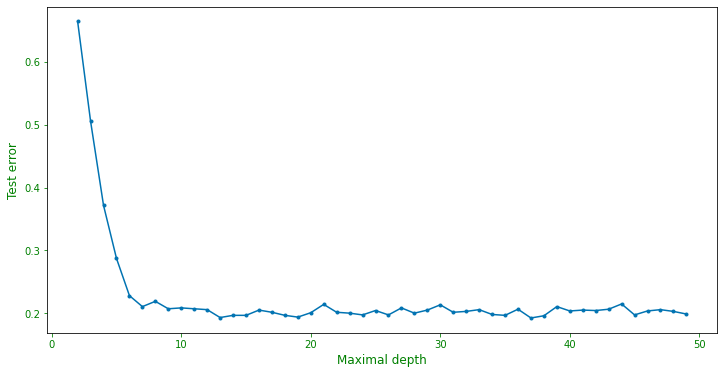

In [255]:

# TODO we plot the error curve using ErrorCurve class for digits data set and using cross-validation_score
error_curve_digits = ErrorCurve(k_range=range(
    2, 50), criterion="entropy", cross=True)
# * fit it, plot it for gini
split_index = int(len(data)*4/5)
error_curve_digits.fit_curve(
    data[:split_index, :], target[:split_index], data[split_index:, :], target[split_index:])
error_curve_digits.plot(marker=".", label="gini")
print(f"the best max_depth is {error_curve_digits.best_param()}")


## Question 6

In [256]:

# TODO we start by defining the plot_learning_curve which helps to plot learning curve
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


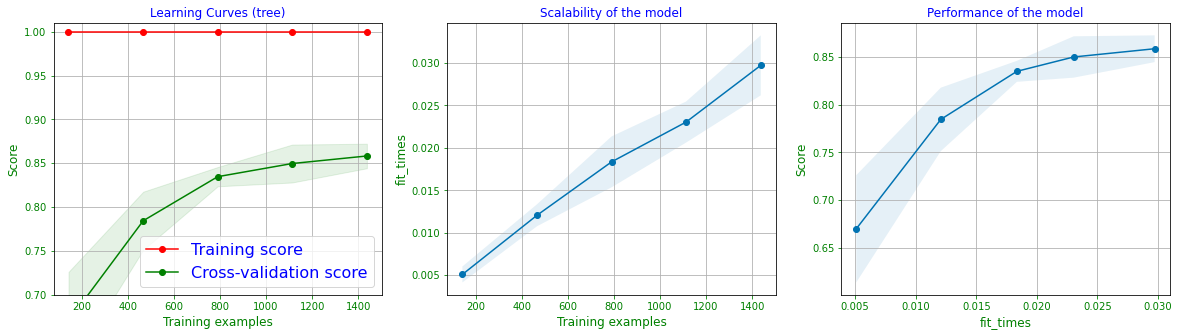

<Figure size 864x432 with 0 Axes>

In [257]:

# ! we import learning_curve and shuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# TODO then we plot the learning Curves for our decision tree classifier

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
title = r"Learning Curves (tree)"
clf_digits = DecisionTreeClassifier(
    max_depth=error_curve_digits.best_param(), criterion=error_curve_digits.criterion)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(
    clf_digits, title, data, target, axes=axes, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()
plt.tight_layout()



## Question 7

In [258]:

# ! import LogisticRegression
from sklearn.linear_model import LogisticRegression

# ** fit and compare logisticregression with decision trees classifier
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(
    "The score of the basic logistic regression model is : ",
            f"{logreg.score(X_test, y_test):.2f}")
print(
    "The score of the basic tree classifier model is", 
            f" : {clf.score(X_test, y_test):.2f}")


The score of the basic logistic regression model is :  0.22
The score of the basic tree classifier model is  : 0.29


We notice that the 3 class logistic regression is slightly equivalent to the decision tree model in terms of accuracy

## Question 8

In [259]:

# TODO print the coefficientsand intercept of our logic here
print(f"the coefficients of the model are : {logreg.coef_}")
print(f"the intercept of the model are : {logreg.intercept_}")


the coefficients of the model are : [[ 0.05292032  0.19007654]
 [-0.03942858 -0.02235456]
 [ 0.04399117  0.02202199]
 [-0.05748292 -0.18974397]]
the intercept of the model are : [-0.05897798  0.06194217  0.05267682 -0.05564101]


## Question 9

In [260]:
print(
    "The .score logistic regression return the comparison results between" ,
        f"prediction and true value, which is for this case equal to : {logreg.score(X_test, y_test):.2f}")


The .score logistic regression return the comparison results between prediction and true value, which is for this case equal to : 0.22
